# Importing Libraries

In [20]:
import pandas as pd
import io
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor

## Loading Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dwipddalal/Revenue-Prediction/main/Data.csv')
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


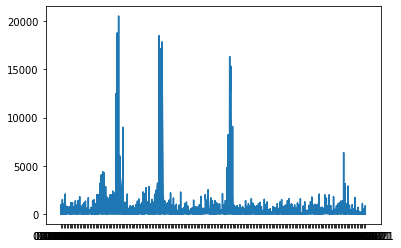

In [21]:
plt.plot(df['date'],df['revenue'])
plt.show()

In [3]:
df.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [4]:
data = df.drop(columns= ['date', 'campaign'])
data

,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,adgroup 1,ad 1,24,6,0.08,0,0.00
1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,adgroup 3,ad 1,13,4,0.04,0,0.00
3,adgroup 4,ad 1,5,4,0.08,0,0.00
4,adgroup 1,ad 2,247,126,1.29,4,925.71
...,...,...,...,...,...,...,...
4566,adgroup 3,ad 55,19,6,0.07,0,0.00
4567,adgroup 4,ad 55,1,0,0.00,0,0.00
4568,adgroup 3,ad 56,16,8,0.12,1,93.20
4569,adgroup 1,ad 56,37,13,0.23,0,0.00


## Categorical Encoding

In [5]:
le = preprocessing.LabelEncoder()
le.fit(list(df['adgroup']))
adgrp = le.transform(list(df['adgroup']))
le.fit(df['ad'])
ads = le.transform(list(df['ad']))
data.drop(columns=['adgroup','ad'] , inplace= True)


In [6]:
data.insert(1, 'adgroup', adgrp)
data.insert(0, 'ad', ads)

In [7]:
data

,ad,impressions,adgroup,clicks,cost,conversions,revenue
0,0,24,0,6,0.08,0,0.00
1,0,1,1,0,0.00,0,0.00
2,0,13,2,4,0.04,0,0.00
3,0,5,3,4,0.08,0,0.00
4,11,247,0,126,1.29,4,925.71
...,...,...,...,...,...,...,...
4566,50,19,2,6,0.07,0,0.00
4567,50,1,3,0,0.00,0,0.00
4568,51,16,2,8,0.12,1,93.20
4569,51,37,0,13,0.23,0,0.00


### Splitting the dataset into train-test split


In [8]:
X = data.loc[:, data.columns != 'revenue']
y = data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)

# Now we shall run different models to see the perfomance of these models on our dataset

## Linear Regression

In [9]:
model = LinearRegression()
model1=model.fit(X_train , y_train)
y_pred=model1.predict(X_test)

mean_squared_error(y_test, y_pred,squared=False)

216.99461767189328

## K-nearest neighbors

In [10]:
models = KNeighborsRegressor()
modessss = models.fit(X_train, y_train)
y_pred=modessss.predict(X_test)

mean_squared_error(y_test, y_pred,squared=False)

518.8906169472699

## SGDRegressor

In [11]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive'))
regg=reg.fit(X_train, y_train)
y_pred4=regg.predict(X_test)
mean_squared_error(y_test, y_pred4,squared=False)

219.91889730276262

#Random Forest

In [12]:
rn = RandomForestRegressor(n_estimators=500, max_depth=8, random_state=0)
ran = rn.fit(X_train, y_train)
preds = ran.predict(X_test)
mean_squared_error(y_test, preds,squared=False)

169.07013774337113

# XGBRegressor
I shall pass different hyper-parameters in XGBRegressor and see the results for these hyper-parameters and then load all the models that perform well in Soft voting model

In [13]:
xg = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state = 0)
xga = xg.fit(X_train, y_train)
preds = xga.predict(X_test)
mean_squared_error(y_test, preds,squared=False)

[22:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


156.9729434056588

In [14]:
xg2 = XGBRegressor(n_estimators=500, learning_rate=0.04, random_state = 0)
xgaa = xg2.fit(X_train, y_train)
preds = xgaa.predict(X_test)
mean_squared_error(y_test, preds,squared=False)

[22:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


157.822097069083

In [15]:
xg3 = XGBRegressor(n_estimators=1500, learning_rate=0.08, random_state = 0)
xgaaa = xg3.fit(X_train, y_train)
preds = xgaaa.predict(X_test)
mean_squared_error(y_test, preds,squared=False)

[22:33:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


165.2542143535488

In [16]:
xg4 = XGBRegressor(n_estimators=2000, learning_rate=0.1, random_state = 0)
xgaaaa = xg4.fit(X_train, y_train)
preds = xgaaaa.predict(X_test)
mean_squared_error(y_test, preds,squared=False)

[22:33:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


161.20528234232106

# Multi Layer Perceptron

In [17]:
ren = MLPRegressor(hidden_layer_sizes=(15,),random_state=1, max_iter=2000)
renn = ren.fit(X_train, y_train)
y_pred5=renn.predict(X_test)
mean_squared_error(y_test, y_pred5,squared=False)

179.9825689923396

# Soft Voting of above models that gave good performance 
Soft voting not only reduces the error in comparision to above models but also produce a robust model that will wrok well on divere dataset 

In [18]:
eclf1 = VotingRegressor(estimators=[('xga',xg),('xgaa',xg2),('xgaaa',xg3),('xgaaaa',xg4),('ran', rn)])
eclf11 = eclf1.fit(X_train, y_train)
y_pred_final=eclf11.predict(X_test)
mean_squared_error(y_test, y_pred_final,squared=False)

[22:33:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


156.13432099569047